# Análise Exploratória de Dados

Este notebook realiza uma análise exploratória dos dados do projeto de previsão de churn bancário. As etapas incluem:

1. Carregamento e visualização inicial dos dados.
2. Análise estatística descritiva.
3. Visualização gráfica para identificar padrões e tendências nos dados.

# Etapa 1: Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Etapa 2: Leitura dos dados

In [2]:
df = pd.read_csv("data/BankChurners_tratado.csv")
df['Attrition_Flag_Bin'] = df['Attrition_Flag'].map({"Attrited Customer": 1, "Existing Customer": 0})


# Etapa 3: Análise da variável alvo

In [3]:
# Visualização inicial dos dados
try:
    if 'df' in globals():
        print("[ℹ️] Visualizando as primeiras linhas da base de dados...")
        display(df.head())
        print("[ℹ️] Estatísticas descritivas das variáveis numéricas...")
        display(df.describe())
    else:
        print("[❌] Variável 'df' não está definida. Certifique-se de que a célula de leitura dos dados foi executada com sucesso.")
except Exception as e:
    print(f"[❌] Erro ao visualizar os dados: {e}")
    raise

[ℹ️] Visualizando as primeiras linhas da base de dados...


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Ticket_Medio,Transacoes_por_Mes,Gasto_Medio_Mensal,Rotativo_Ratio,Disponibilidade_Relativa,Caiu_Transacoes,Caiu_Valor,Faixa_Idade,Renda_Class,Attrition_Flag_Bin
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,27.238095,1.076923,29.333333,0.061224,0.938776,1,1,30-49,Alta,0
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,39.121212,0.750000,29.340909,0.104651,0.895349,1,1,30-49,Baixa,0
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,94.350000,0.555556,52.416667,0.000000,1.000000,1,1,50-69,Alta,0
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,58.550000,0.588235,34.441176,0.759734,0.240266,1,1,30-49,Baixa,0
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,29.142857,1.333333,38.857143,0.000000,1.000000,1,1,30-49,Alta,0


[ℹ️] Estatísticas descritivas das variáveis numéricas...


,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,...,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2,Ticket_Medio,Transacoes_por_Mes,Gasto_Medio_Mensal,Rotativo_Ratio,Disponibilidade_Relativa,Caiu_Transacoes,Caiu_Valor,Attrition_Flag_Bin
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,...,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,...,0.159997,0.840003,62.612717,1.923120,131.011977,0.274892,0.725108,0.065962,0.098055,0.160660
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,...,0.365301,0.365301,26.404198,0.911977,115.722300,0.275689,0.275689,0.248228,0.297403,0.367235
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,...,0.000008,0.000420,19.137931,0.188679,10.000000,0.000000,0.001232,0.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,...,0.000099,0.999660,47.514573,1.272727,62.361111,0.022714,0.497309,0.000000,0.000000,0.000000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,...,0.000181,0.999820,55.794872,1.857143,105.800000,0.175650,0.824350,0.000000,0.000000,0.000000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,...,0.000337,0.999900,65.476673,2.361111,141.361149,0.502691,0.977286,0.000000,0.000000,0.000000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,...,0.999580,0.999990,190.193182,9.769231,1256.846154,0.998768,1.000000,1.000000,1.000000,1.000000


# Etapa 4: Correlação entre variáveis numéricas

[ℹ️] Gerando gráficos de distribuição...


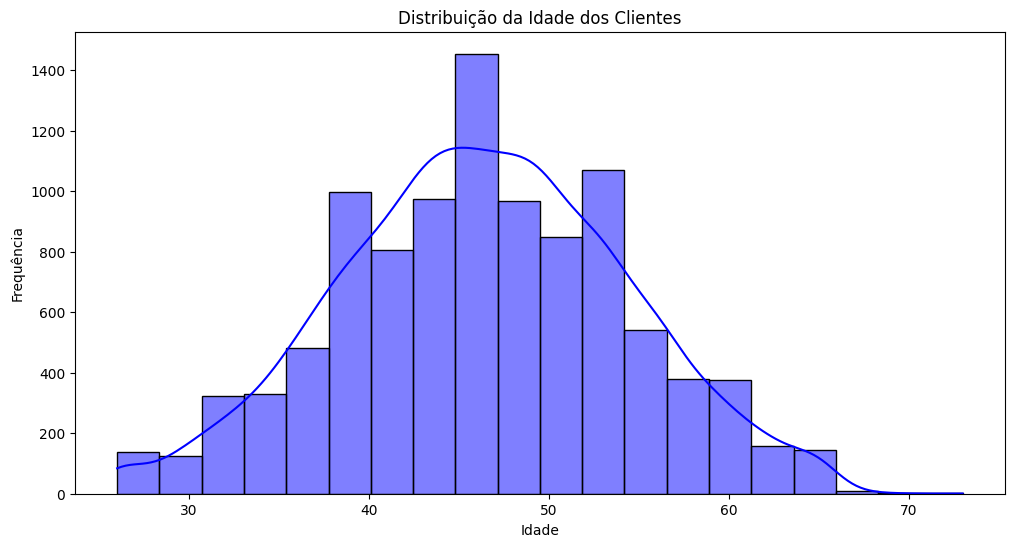

C:\Users\Iago\AppData\Local\Temp\ipykernel_6936\697678189.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Attrition_Flag', data=df, palette="viridis")


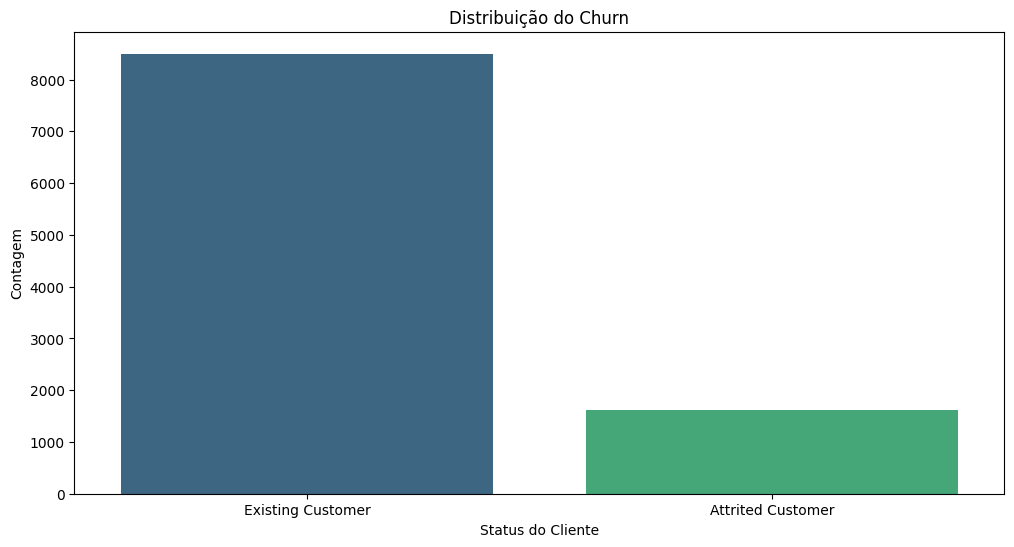

[✔️] Gráficos gerados com sucesso.


In [4]:
# Análise gráfica: Distribuição de variáveis
try:
    print("[ℹ️] Gerando gráficos de distribuição...")
    plt.figure(figsize=(12, 6))
    sns.histplot(df['Customer_Age'], kde=True, bins=20, color="blue")
    plt.title("Distribuição da Idade dos Clientes")
    plt.xlabel("Idade")
    plt.ylabel("Frequência")
    plt.show()

    plt.figure(figsize=(12, 6))
    sns.countplot(x='Attrition_Flag', data=df, palette="viridis")
    plt.title("Distribuição do Churn")
    plt.xlabel("Status do Cliente")
    plt.ylabel("Contagem")
    plt.show()
    print("[✔️] Gráficos gerados com sucesso.")
except Exception as e:
    print(f"[❌] Erro ao gerar gráficos: {e}")
    raise

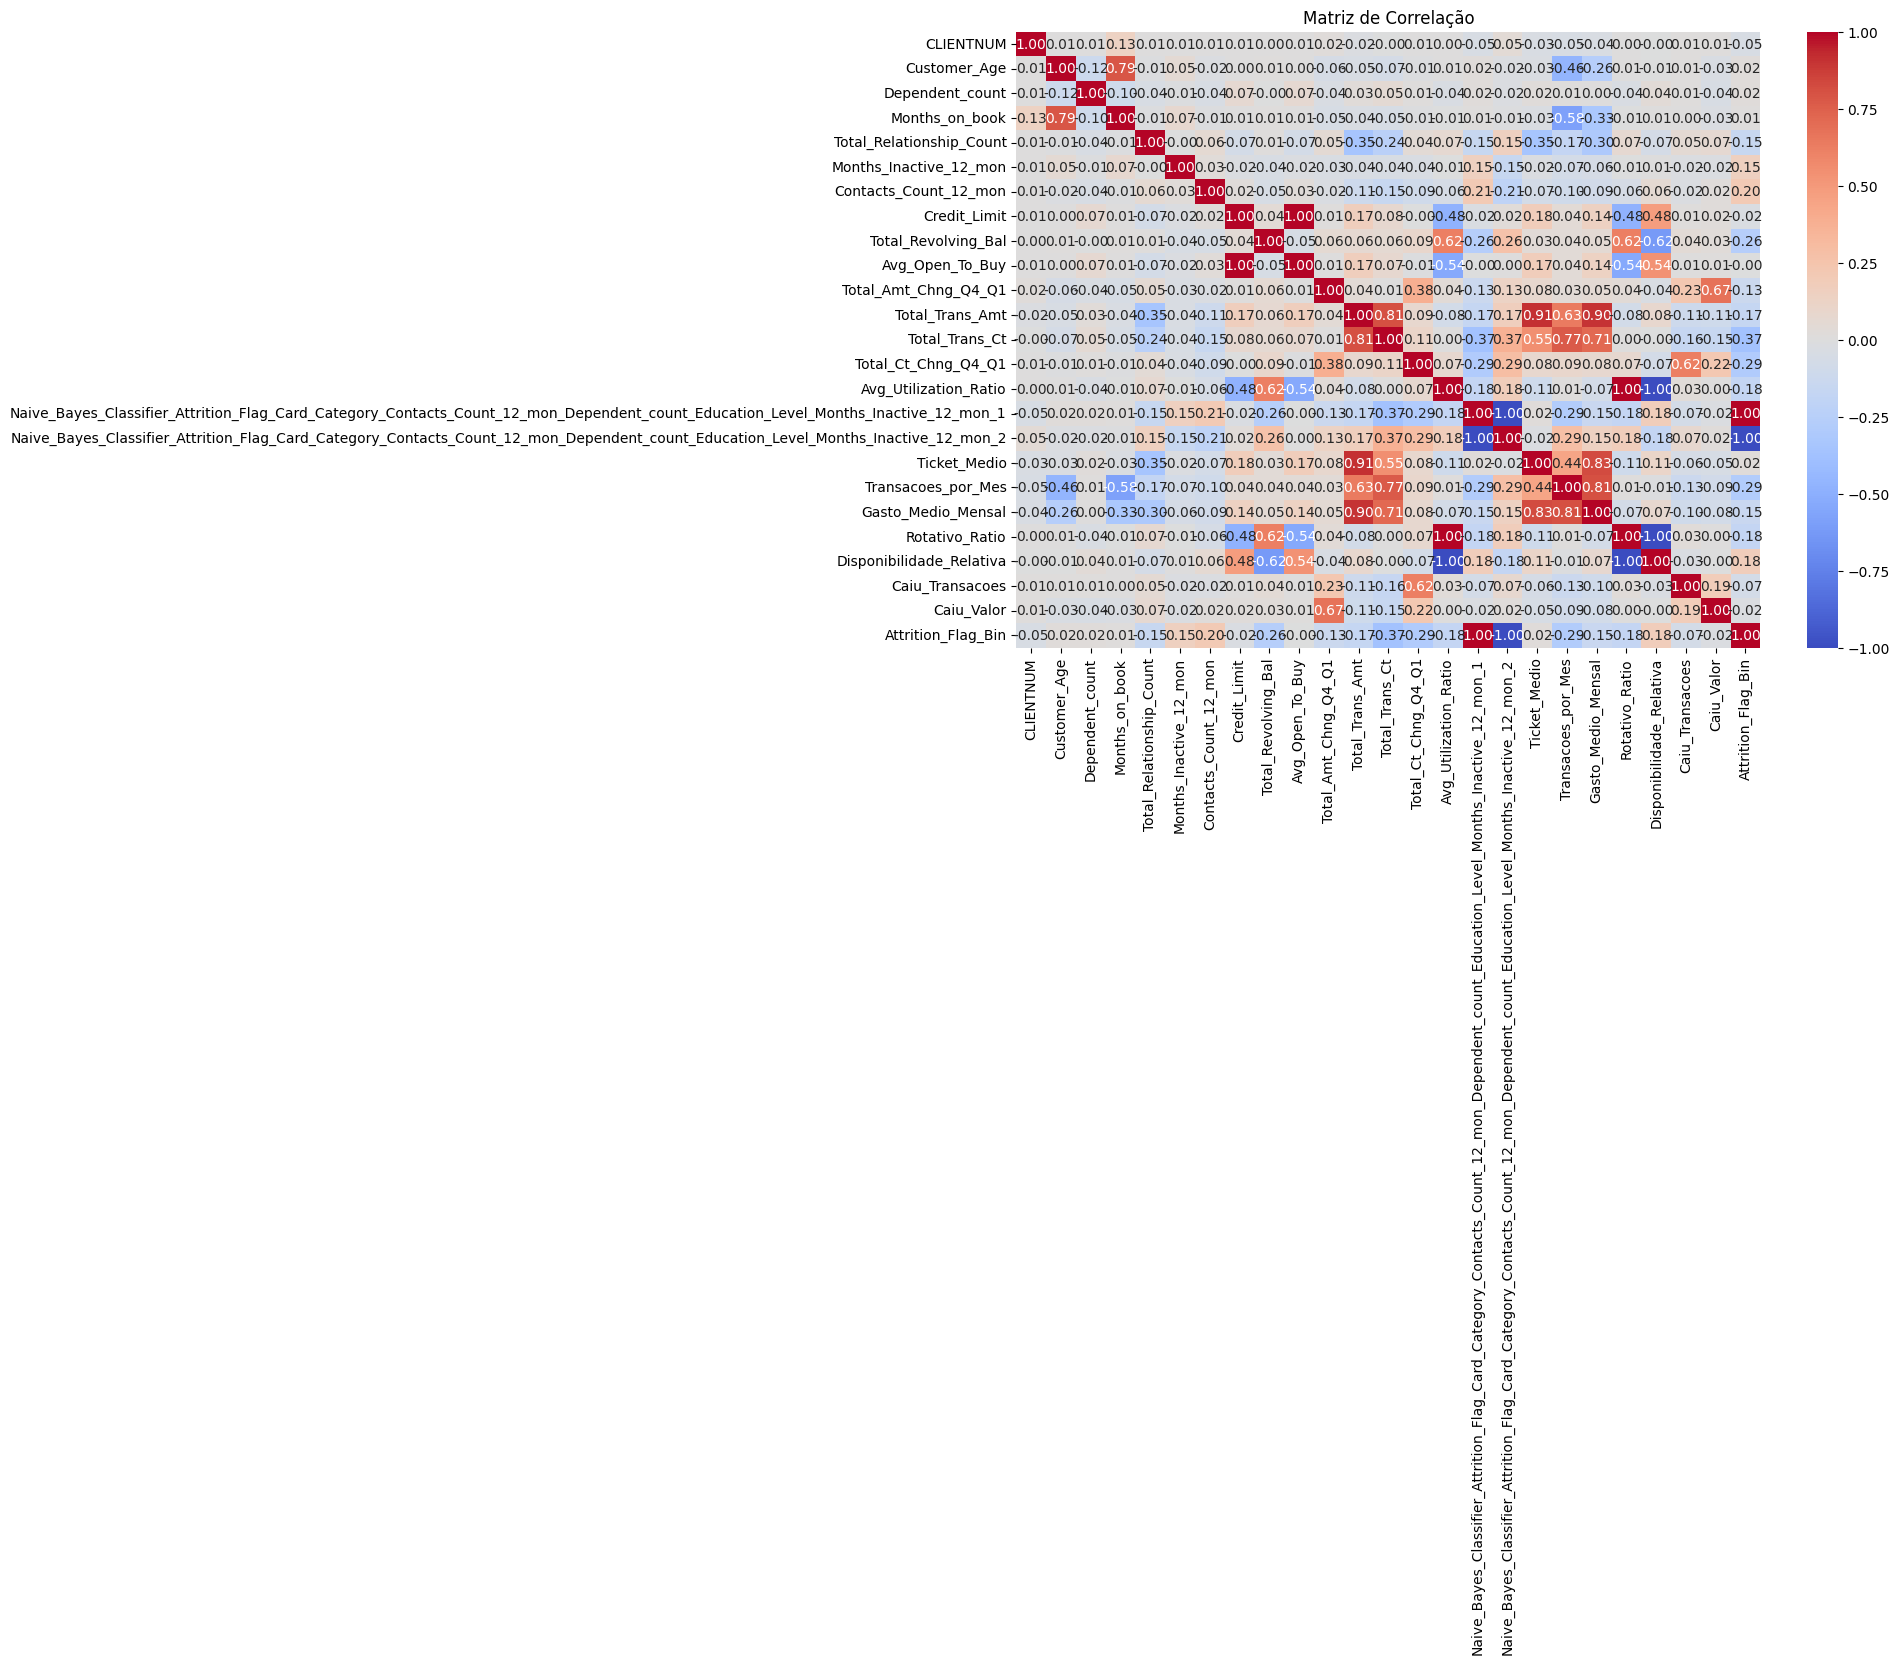

In [5]:
corr = df.select_dtypes(include='number').corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Matriz de Correlação")
plt.show()

# Etapa 5: PCA

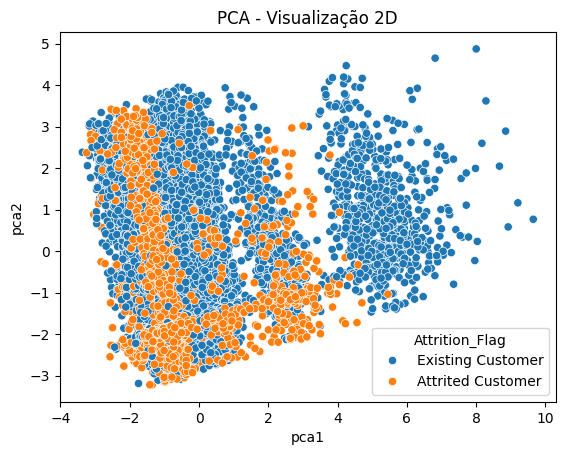

In [6]:
variaveis = ['Customer_Age', 'Dependent_count', 'Credit_Limit', 'Total_Trans_Amt', 'Total_Trans_Ct',
             'Ticket_Medio', 'Gasto_Medio_Mensal', 'Rotativo_Ratio', 'Total_Revolving_Bal',
             'Avg_Utilization_Ratio', 'Caiu_Valor', 'Caiu_Transacoes']

X = df[variaveis]
X_std = StandardScaler().fit_transform(X)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_std)

df['pca1'] = pca_result[:,0]
df['pca2'] = pca_result[:,1]
sns.scatterplot(data=df, x='pca1', y='pca2', hue='Attrition_Flag')
plt.title("PCA - Visualização 2D")
plt.show()

# Etapa 6: KMeans

c:\Users\Iago\OneDrive\Desktop\Projeto Churn\Bank-Churn-Prediction-montes_claros\.venv\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] O sistema não pode encontrar o arquivo especificado
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\Iago\OneDrive\Desktop\Projeto Churn\Bank-Churn-Prediction-montes_claros\.venv\lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
  File "C:\Users\Iago\AppData\Local\Programs\Python\Python310\lib\subprocess.py", line 503, in run
    with Popen(*popenargs, **kwargs) as process:
  File "C:\Users\Iago\AppData\Local\Programs\Python\Python310\lib\subprocess.py", line 971, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,

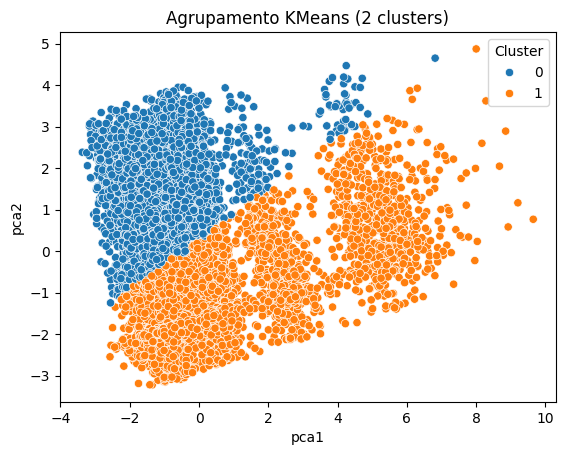

In [7]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_std)
df['Cluster'] = kmeans.labels_
sns.scatterplot(data=df, x='pca1', y='pca2', hue='Cluster', palette='tab10')
plt.title("Agrupamento KMeans (2 clusters)")
plt.show()

# Etapa 7: Conclusão

In [8]:
print("Resumo:\n- Classes estão desbalanceadas (16% churn).\n- Variáveis como Total_Trans_Ct, LTV_Proxy e Score_Relacionamento mostram boas separações.\n- PCA e KMeans ajudam a visualizar agrupamentos.")


Resumo:
- Classes estão desbalanceadas (16% churn).
- Variáveis como Total_Trans_Ct, LTV_Proxy e Score_Relacionamento mostram boas separações.
- PCA e KMeans ajudam a visualizar agrupamentos.
